In [7]:
%matplotlib inline
import gcsfs
import xarray as xr
import matplotlib
import pandas as pd
import cartopy.crs as ccrs
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from esio import ice_plot

In [2]:
### Connect to the Google cloud bucket and open the dataest
#
# Access to the sipn-data set is not yet public. Access to SIPN participants will be provide by end of 2018.
# Questions can be addressed to nicway@uw.edu.

In [4]:
fs = gcsfs.GCSFileSystem(project='sipn2-pangeo', token='browser', access='read_only')
gcsmap = gcsfs.mapping.GCSMap('sipn-data-sic/sic.zarr', gcs=fs, check=False, create=False)

# Open Zarr dataset
ds_gcs = xr.open_zarr(gcsmap)

ds_gcs

<xarray.Dataset>
Dimensions:    (fore_time: 16, init_end: 36, model: 21, x: 304, y: 448)
Coordinates:
  * fore_time  (fore_time) timedelta64[ns] 0 days 7 days 14 days 21 days ...
  * init_end   (init_end) datetime64[ns] 2018-01-28 2018-02-04 2018-02-11 ...
    lat        (x, y) float64 dask.array<shape=(304, 448), chunksize=(152, 224)>
    lon        (x, y) float64 dask.array<shape=(304, 448), chunksize=(152, 224)>
  * model      (model) object 'Observed' 'awispin' 'climatology' ...
  * x          (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * y          (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    SIP        (init_end, model, fore_time, y, x) float64 dask.array<shape=(36, 21, 16, 448, 304), chunksize=(1, 1, 1, 448, 304)>
    anomaly    (init_end, model, fore_time, y, x) float64 dask.array<shape=(36, 21, 16, 448, 304), chunksize=(1, 1, 1, 448, 304)>
    mean       (init_end, model, fore_time, y, x) float64 dask.array<shape=(36

In [5]:
da = ds_gcs.SIP.sel(model='MME').isel(init_end=30, fore_time=4)
da

<xarray.DataArray 'SIP' (y: 448, x: 304)>
dask.array<shape=(448, 304), dtype=float64, chunksize=(448, 304)>
Coordinates:
    fore_time  timedelta64[ns] 28 days
    init_end   datetime64[ns] 2018-08-26
    lat        (x, y) float64 dask.array<shape=(304, 448), chunksize=(152, 224)>
    lon        (x, y) float64 dask.array<shape=(304, 448), chunksize=(152, 224)>
    model      <U3 'MME'
  * x          (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * y          (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...

### Plot the Multi-model mean Sea Ice Concentration (SIC) forecast Initialized on 2018-08-05 with a lead time of 28 days

Text(0.5,1,'Valid time\n2018-09-23')

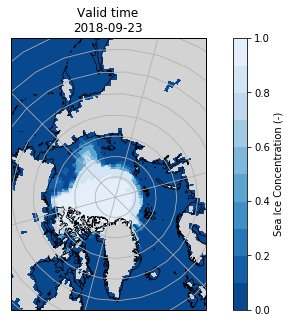

In [8]:
cmap_sic = matplotlib.colors.ListedColormap(sns.color_palette("Blues_r", 10))
cmap_sic.set_bad(color = 'lightgrey')

(f, ax1) = ice_plot.polar_axis()
f.set_size_inches(10, 5)


da.plot.pcolormesh(ax=ax1, x='lon', y='lat', 
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmap_sic,
                      vmin=0, vmax=1, cbar_kwargs={'label':'Sea Ice Concentration (-)'})
ax1.set_title('Valid time\n'+pd.to_datetime((da.init_end+da.fore_time).values).strftime('%Y-%m-%d'))